In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [34]:
url = 'http://bit.ly/w-data'
df=pd.read_csv(url)

### exploring the data

In [35]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [36]:
df.shape

(25, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

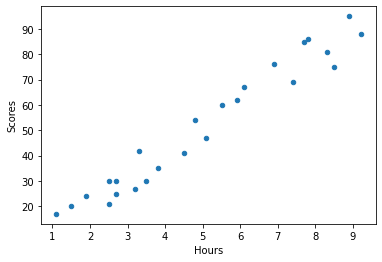

In [46]:
df.plot(kind='scatter',x='Hours',y='Scores')

In [39]:
df.corr(method ='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [44]:
df.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [54]:
hours=df['Hours']
score=df['Scores']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

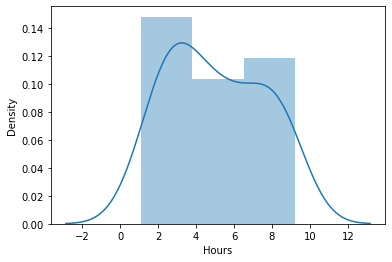

In [53]:
sns.distplot(hours)

### This means that there is a positive strong Correlation between hours of study and score

In [10]:

x=df.iloc[:,:-1].values
y=df.iloc[:,1].values


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model=LinearRegression()

In [14]:
model.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)

In [16]:
real_values=pd.DataFrame({'real':y_test,'predected':y_pred})
real_values

,real,predected
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


In [26]:
h=9.25
z =model.predict([[h]])
print('if the student studies {} hours he will git a score of {}'.format(h,z))

if the student studies 9.25 hours he will git a score of [93.45860056]


In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared=False)

4.938382360637607

In [21]:
from sklearn.metrics import  mean_absolute_error
mean_absolute_error(y_test,y_pred)

4.877039354964484

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9735538080811826